![CEE Masthead](http://kyrill.ias.sdsmt.edu/wjc/eduresources/CEE_284_Masthead.png)


# Lotka-Volterra With Python ODE Solvers

## Objectives 

We are going to be making a Python program to Python's ODE Solvers by making a program and function set that we can use for a few applications in the coming unit.

## Lotka-Volterra Scenario

A joint population of herbivores and carnivores are interacting according to the classic [Lotka-Volterra conceptual model](https://mathworld.wolfram.com/Lotka-VolterraEquations.html).  This system is illustrated below.


![Lotka-Volterra Conceptual Model and Equations](http://kyrill.ias.sdsmt.edu/wjc/eduresources/Lotka_Voltarra.png)


With the above framework, we can use a slimmed down equation of 

$$\begin{align*}
\frac{dH}{dt}(t) &= r_{H}H(t) - \beta_{HC} H(t) C(t) \\
\frac{dC}{dt}(t) &= \gamma_{C} \beta_{HC} H(t) C(t) - r_{C}C(t)
\end{align*}$$


where

* $r_H$        = 1.1 net herbivote population *growth* rate per herbivore per unit time

* $\beta_{HC}$ = 0.4 chance a carnivore successfully killing a herbivore 

* $\gamma_C$ = 0.25 "system loss" between successful kills and surplus growth in the carnivore population
* $r_C$      = 0.4 net carnivore population *decline* rate per herbivore per unit time

## Your Mission

Use one of Python's ODE Solvers to calculate the value of $H(t)$ and $C(t)$ for a time series



## Loading the Libraries

We'll start with our standard two go-to libraries.. 
*  [NumPy](https://numpy.org/doc/stable/reference/index.html) : Our basic "math" and array library.
*  [MatplotLib's PyPlot](https://scipy.org/scipylib/index.html) : For some basic plotting..

We don't need this officially, but we are going to borrow the optimization (root-solving) functions from the [SciPy.optimize](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize_scalar.html#scipy.optimize.minimize_scalar) library for our back pocket.

And then we'll crack into these libraries in Scipy.
* [SciPy.integrate](https://docs.scipy.org/doc/scipy/reference/integrate.html) for ODE solving


In [1]:
##########################################################
#
# Library Calls.
#

# loading NumPy

import numpy as np

# loading MatPlotLib's PyPlot routines

import matplotlib.pyplot as plt

# loading SciPy's Optimization routines

import scipy.optimize    as opt
import scipy.integrate   as sciint


#
##########################################################

## Setting up our Differential Function

For starters we will create a small function to calculate our $\frac{d H,C}{dt}(t)$ function.

$$\begin{align*}
\frac{dH}{dt}(H,C) &= r_{H}H - \beta_{HC} H C \\
\frac{dC}{dt}(H,C) &= \gamma_{C} \beta_{HC} H C - r_{C} C \\
\end{align*}$$


Let's start with our pair of constants.


In [2]:
##########################################################
#
# Here are our constants
#

r_H      = 1.10   # net prey gain per prey amounts

beta_HC  = 0.20   # probability of "sucessful"
                  #  predator-prey interactions

gamma_C  = 0.25   # conversion between tasty prey and 
                  #  cute baby carnivores

r_C      = 0.4    # net predator loss per predator amounts

#
##########################################################

We'll make a function for our prognostic equations.  These will resemble two simultaneous equations (because they are!)

What will be strange, though is the inclusion of an additonal argument, one for the field overwhich we will be eventually integrating: Time.  That parameter goes up front as we will do here...

In [3]:
##########################################################
#
# Our differential function.
#
#   The first argument is the variable over which you 
#      are integrating.  Subsequent ones are the arguments
#      for the function.  
#

def dHC_dt(t, HC):
    H = HC[0]
    C = HC[1]

    dH_dt = r_H * H - beta_HC * H * C
    dC_dt = beta_HC * gamma_C * H * C - C * r_C

    return [dH_dt, dC_dt]
    

#
##########################################################

It's aways a good idea to test our functions (Again, no worries about the first argument.  Just set it to zero):

In [4]:
##########################################################
#
# Test Our differential function.
#
#   The first argument is the variable over which you 
#      are integrating.  Subsequent ones are the arguments
#      for the function.  
#

print()
print("dHCdt(H=0.00,C=0.00)", dHC_dt(0, [0.00, 0.00]) )
print("dHCdt(H=1.00,C=0.50)", dHC_dt(0, [1.00, 0.50]) ) 
print("dHCdt(H=0.50,C=0.25)", dHC_dt(0, [0.50, 0.25]) ) 
print()
      
#
##########################################################


dHCdt(H=0.00,C=0.00) [0.0, 0.0]
dHCdt(H=1.00,C=0.50) [1.0, -0.17500000000000002]
dHCdt(H=0.50,C=0.25) [0.525, -0.09375]



## Getting the Equlibrium State(s)

We also can borrow the [scipy.optimize.fsolve](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fsolve.html) function to quickly swag at point where the system will be in equilibrium.

$$\begin{align*}
0 &= r_{H}H - \beta_{HC} H C \\
0 &= \gamma_{C} \beta_{HC} H C - r_{C} C \\
\end{align*}$$


This is root-fu$^{TM}$, plain and simple.  

For this system, we can guess at the "Trivial Solution." Without foxes and bunnies, nothing will happen. Likewise, without bunnies, foxes will die off. Without foxes, bunnies multiply... a lot!

Thus, one solution is 

$$\begin{align*}
H &= 0 \\
C &= 0 \\
\end{align*}$$

What about any more?  Hypothetically, there should be a point where bunnies and foxes are in balance.

For a first guess, we likely should choose a pair that is [obviously] positive.

So let's try it.

<div class="alert alert-danger">
  <strong>Uh....</strong> This isn't going to end well.
</div>

In [5]:
##########################################################
#
# Equilibrium Points
#
#   We need to do a simple bracketed function for this
#


HC_0 = [9,1]

HC_eq = opt.fsolve(func = dHC_dt, 
                   x0   =   HC_0)
print()
print("Our H, C first guess pair: ", HC_0 )
print("Our H, C equilibrium pair: ", HC_eq)
print()
print("dvdt(V_eq) :  ", dHC_dt(0, HC_eq)  ," critters per time")
print()

#
##########################################################

TypeError: dHC_dt() missing 1 required positional argument: 'HC'

Uh oh.  So what happened here?

### Rabbit Hole: Using "lambda" to recast an existing function

For starters, close inspection of the function we made, dHC_dt() uses two arguments, $t$, and $\overrightarrow{HC}$. 

The fsolve field wants to solve for *one* value (for which we use a vector array).  That nagging $t$ must be dealt with somehow.  

We *could* rewrite the function, but we can imagine a case where our function is long.  Also, we already made it so in the name of tidiness lets look for a more general way to do this.

Here it is using the [lambda](https://docs.python.org/3/tutorial/controlflow.html#lambda-expressions) resource.  Lambda expressions can be used to create very simple one-line functions:

For any simple procedure that we can just for now call $f(var_1, var_2,... var_n)$

**lambda** $var_1$, $var_2$,... $var_n$ **:** $f(var_1, var_2,... var_n)$

so for example...

```
a_plus_b = lambda a, b: a+b
```

In [6]:
##########################################################
#
# A quick lambda one-liner (a+b)
#

a_plus_b = lambda a, b: a+b

print()
print("a_plus_b(1,2) = ", a_plus_b(1,2))
print()

#
##########################################################


a_plus_b(1,2) =  3



We also can use an existing function and insert hard values into select that functions argument.  For us, we can do that here and use this quick function with its "phantom" $t$.  

Let's rewrite our earlier code-block.

In [7]:
##########################################################
#
# Equilibrium Points with Lambda
#
#   We just need to do a simple bracketed function for this
#

# Lambda modification to our earlier function

mini_func = lambda HC: dHC_dt( t =  0, 
                              HC = HC)

# First guess

HC_0 = [9,1]

# Testing the First Guess

print()
print("mini_func(HC = [9,1]) = ", mini_func(HC = HC_0))
print()

# Solving for the steady state

HC_eq = opt.fsolve(func = mini_func, 
                   x0   =      HC_0)

print("Our H, C first guess pair: ", HC_0 )
print("Our H, C equilibrium pair: ", HC_eq)
print()
print("mini_func(HC_eq) =", mini_func(HC_eq), "critters per time")
print("dHC_dt(0, HC_eq) =", dHC_dt(0, HC_eq), "critters per time")
print()

#
##########################################################


mini_func(HC = [9,1]) =  [8.1, 0.04999999999999999]

Our H, C first guess pair:  [9, 1]
Our H, C equilibrium pair:  [8.  5.5]

mini_func(HC_eq) = [np.float64(0.0), np.float64(0.0)] critters per time
dHC_dt(0, HC_eq) = [np.float64(0.0), np.float64(0.0)] critters per time



## The Solvers for Differential Equations in Python

With our equation system we can solve this with a brute force Euler's method solution (we have a parallel version of this activity presented with this one), or one of [integration functions available in Python's scipy resource](https://docs.scipy.org/doc/scipy/tutorial/integrate.html).  

The current set of equations presents a classical Initial Value Problem in Differential Equations.

Here we are using the [scipy.integrate.solve_ivp](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html) which is designed for initial value problems.

The default solver for this function is a fourth-order Runge-Kutta.  (We've included the specific line that would call this below, anyway.)

Here is what you need for this at minimum

1. A callable function that includes the basic functions.  The arguments can be as follows:
  1.  The first value needs to be the single scalar for the derivative in the function(s).  For us, that's time.
  2.  a 1-D vector or scalar of there's just one derivative containing the initial conditions for the function(s)
2. A two-element list of your start and end points for the duration of your solution range (for this case, it will be for your valid time range).
3. List of your initial conditions.

There are fancier things you can do where you can use parameters as an argument, such as changes in herd immunity, but right now, we are going for simplicity in the scarier function calls. 


In [8]:
################################################
#
# Use the solve_ivp function
#

TimePeriod = 50.

Y = sciint.solve_ivp(dHC_dt,                # Function(t, F(t)) 
                     [0, TimePeriod],       # start and end times
                     [5,5],                 # initial conditons, Fo
                     method       = "RK45", # method (defaults to RK45)
                     dense_output = True)   # create a detailed continuous solution

display(Y)

#
################################################

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  1.510e-01 ...  4.804e+01  5.000e+01]
        y: [[ 5.000e+00  5.085e+00 ...  5.060e+00  7.883e+00]
            [ 5.000e+00  4.890e+00 ...  4.873e+00  4.088e+00]]
      sol: <scipy.integrate._ivp.common.OdeSolution object at 0x11db28860>
 t_events: None
 y_events: None
     nfev: 260
     njev: 0
      nlu: 0

The output for the above function is an object with a number of return variables that can be accessed from your return value (for the above, that's the Y).  

We want the contents of the "sol" object which contains what we need to access the results of the solution.

"sol" requires an argument (just like a function).  So if we want a time series, we throw in our array.  If we want any single time value, we can enter that time as well.

In [9]:
################################################
#
# Examining the sol output fields
#
print()
print("Output for Select Time Steps")
print()
print("output at time=0: ",Y.sol(0))
print("output at time=1: ",Y.sol(2))
print("output at time=2: ",Y.sol(3))
print()

#
################################################


Output for Select Time Steps

output at time=0:  [5. 5.]
output at time=1:  [7.62803267 4.11036271]
output at time=2:  [9.98967076 4.27457862]



we can also split our sol output into a distinct functions for our bunnies and carnivores.

We can also make a working time variable. 

In [10]:
################################################
#
# Creating distinct functions and a time coordinates
#

time = np.linspace(start =          0,
                   stop  = TimePeriod,
                   num   =        500)

HCsol = Y.sol(time)

H = HCsol[0]
C = HCsol[1]

#
################################################

## Plotting Things Out!

Let's close things up

To see how to customize your series, try this resource for the [matplotlib.pyplot.plot()](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) command.

I'm also adding some bells and whistles to the plot: 

* [matplotlib.pyplot.axhline](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.axhline.html#matplotlib.pyplot.axhline) Draw a horizontal line (for us, it'll be at the equilibrium point).
[matplotlib.pyplot.legend](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.legend.html#matplotlib.pyplot.legend) Draw a Legend.  Items will be in rhe same order as plotted
* [matplotlib.pyplot.ylim](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.ylim.html#matplotlib.pyplot.ylim) and [matplotlib.pyplot.xlim](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.xlim.html#matplotlib.pyplot.xlim) Override automated axis limits with your own
* [matplotlib.pyplot.xlabel](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.xlabel.html#matplotlib.pyplot.xlabel) and  [matplotlib.pyplot.ylabel](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.ylabel.html#matplotlib.pyplot.ylabel) For axis labeling
* [matplotlib.pyplot.title](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.title.html#matplotlib.pyplot.title) Include a title
* [matplotlib.pyplot.show](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.show.html#matplotlib.pyplot.show) Render the plot

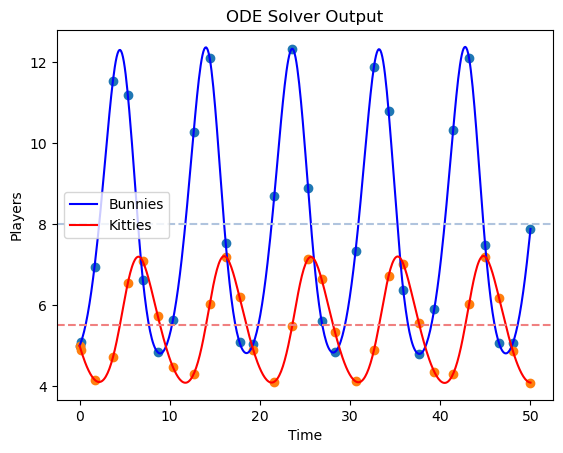

In [11]:
##########################################################
#
# Plot the Results
#

# plot the players

# the time functions

plt.plot(time, H, color = "blue")
plt.plot(time, C, color = "red")

# the solveivp time series

plt.scatter(Y.t, Y.y[0])
plt.scatter(Y.t, Y.y[1])

# plot equilibrium values

plt.axhline(y         =         HC_eq[0], 
            color     = "lightsteelblue", 
            linestyle =         "dashed")

plt.axhline(y         =         HC_eq[1], 
            color     =     "lightcoral", 
            linestyle =         "dashed")


# Add a legend

plt.legend(["Bunnies",
            "Kitties"])

# titles and labels

plt.title("ODE Solver Output")
plt.ylabel("Players")
plt.xlabel("Time")

# render

plt.show()

#
##########################################################

Here is another plot that we like to do with oscillating systems

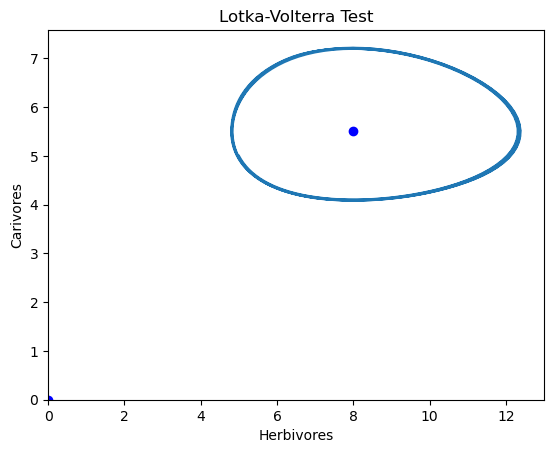

In [12]:
##########################################################
#
# Plot the Results
#

# plot the players against each other

plt.plot(H,
         C)

# equilibrium points

plt.plot(np.array([0,   HC_eq[0]]),
         np.array([0,   HC_eq[1]]),
         color     =        "blue",
         linestyle =        "none",
         marker    =           "o")

# titles and labels

plt.title("Lotka-Volterra Test")

plt.xlabel("Herbivores")
plt.ylabel("Carivores")

# render

plt.ylim(bottom = 0)
plt.xlim(left   = 0)

plt.show()

#
##########################################################

## Extra for those of you already with Diff-E-Fu behind you : Making Phase Plots - with Vectors and Streamlines!

This is beyond the scope of what we should be doing here but this is for fun.  When we illustrated how Euler's method worked, we did this using a vector field that plotted out the trajectories of our emptying rate (or filling rate) for given value of Volume.  This is no differnet...

... except...

this plot will show the interaction between the Carnivores vs the Herbivores.  

Here is the workflow to make this happen.

*  Create a grid of your two variables using the function [numpy.meshgrid](https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html) to make a pair of 2-d arrays that span the range of the two variables against which we want to make the vectors
*  Populate two vectors (we often call them U for the X-axis and V-for the Y-axis) using your dx/dt and dy/dt functions.
*  Normalize your vectors by the local magnitude $\sqrt{u^2+v^2}$
*  plot your vectors using the function [matplotlib.pyplot.quiver()](https://matplotlib.org/3.3.2/api/_as_gen/matplotlib.pyplot.quiver.html)
*  plot streamlines using the function [matplotlib.pyplot.streamplot()](https://matplotlib.org/3.3.2/api/_as_gen/matplotlib.pyplot.streamplot.html)

*  add any extra goodies like plotting your earlier solution.

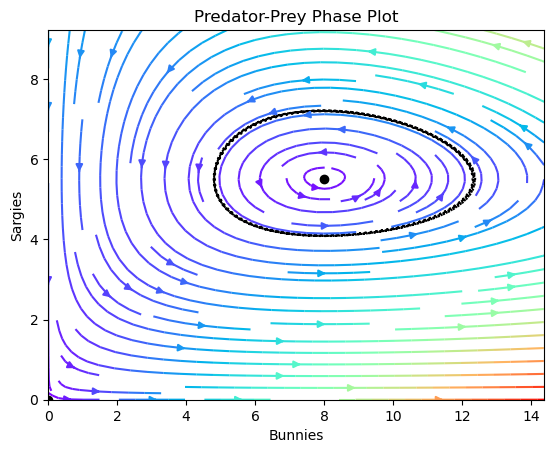

In [17]:
###########################################################
#
# Creating a Phase Plot
#

# Create meshes for our 2 players the comma sends into two
#   variables.

H1d = np.linspace(0.001,H.max() + 2, 25)
C1d = np.linspace(0.001,C.max() + 2, 25)

H2d,C2d = np.meshgrid( H1d ,   
                       C1d )

# the x "velocity" (u) is our dHdt equation

U = r_H * H2d - beta_HC * H2d * C2d

# the y "velocity" (v) is our dHCdt equation

V = gamma_C * beta_HC * H2d * C2d - r_C * C2d

# Normalize the "velocity field" to make the arrows all the same size

M = np.sqrt(U**2+V**2)  

# and plot it out!

# equilibrium points

plt.plot(np.array([0,   HC_eq[0]]),
         np.array([0,   HC_eq[1]]),
         color     =        "black",
         linestyle =        "none",
         marker    =           "o")

# our solution

plt.plot(H, C, color = "black", linestyle="dotted")

#streamlines for any solutions

# the quiver or streamline commands here also uses 
#    M to "color" the vectors by "speed"

plt.streamplot(H1d, C1d, U2, V2, 
               color =              M, 
               cmap  = plt.cm.rainbow)

plt.title("Predator-Prey Phase Plot")
plt.xlabel("Bunnies")
plt.ylabel("Sargies")

plt.ylim(bottom = 0)
plt.xlim(left   = 0)

plt.show()
#
##########################################################



Also, in looking at this kind of behavior in general, different system models showing alternative interactions (like giving the herbivore a _limited_ food source) will have different behaviors.  For example, some scenarios can spiral to a single convergence point.  Others have tipping points to where both populations may crash, or one population explodes to the determent of other interacting "players."  Some Differential Equation Classes will show ways to anticpate these behaviors by working with the raw equations.  

While beyond the scope of this class, you should be able to find those methods in most Diff-E-Fu textbooks be the topic matter be in your syllabus or not.  If later on you ~are crazy enough~ decide to take CEE 615, Environmental Systems Modeling we explore this concept in further details.  

Meanwhile explore the above case by using different $r_x$'s, $\beta_CH$'s, and $\gamma_C$'s, along with different initial conditions.  It's best to use a very fine time step to see the results without them being botched by numerical instabilities caused by having to coarse a $\Delta t$ 

## Version Information

In [18]:
################################################################
#
# Loading Version Information
#

%load_ext version_information

%version_information version_information, numpy, matplotlib, scipy

#
################################################################

The version_information extension is already loaded. To reload it, use:
  %reload_ext version_information


Software versions
Python 3.12.9 64bit [Clang 18.1.8 ]
IPython 9.1.0
OS macOS 15.4 arm64 arm 64bit
version_information 1.0.4
numpy 2.2.4
matplotlib 3.10.1
scipy 1.15.2
Tue Apr 15 09:05:26 2025 MDT